In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from google.colab import drive 
import os 

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/


/content/drive/My Drive


In [4]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning/Logistic Regression')

**Data Loading and Preprocessing**

1. Loaded the Occupany Data Set
2. Added the Bias term to the Dataset
3. Sepereated the Target values in the dataset
4. Random shuffling and splitting of data based on 80 20 ratio criteria
5. Removed a few columns from the dataset as they are not making an effect on the entire dataset


In [5]:
path ="data"
#For Occupancy Data Set
xOccTrainData = pd.read_csv(path+'/dataTraining.txt')
xOccTestData1 = pd.read_csv(path+'/dataTest.txt')
xOccTestData2 = pd.read_csv(path+'/dataTest2.txt')

In [6]:
frames = [xOccTrainData, xOccTestData1, xOccTestData2]
xOccData = pd.concat(frames)
trainValues = xOccData.sample(frac=0.8)
testValues = xOccData.drop(trainValues.index)

xOccDataTrain = trainValues[['Temperature','Humidity', 'Light', 'CO2', 'HumidityRatio']]
xOccDataTest = testValues[['Temperature','Humidity', 'Light', 'CO2', 'HumidityRatio']]

yOccDataTrain = trainValues[['Occupancy']]
yOccDataTest = testValues[['Occupancy']]



**Stohastic Gradient Descent/Ascent Algorithm**
1. $min−sgd((fc )c=1,...,C , (∇fc )c=1,...,C , x(0), µ, K):$
2. $C := (1, 2, . . . , C)$
3. $x(0,C):= x(0)$
4. $for$ $k := 1, . . . ,K:$
5. $randomly$ $shuffle$ $C$
6. $x(k,0) := x(k−1,C)$
7. $for$ $i = 1, . . . , C:$
8. $g(k,i−1) := ∇f(c_i)(x(k,i−1))$
9. $∆x(k,i−1) := −g(k,i−1)$
10. $µ(k,i−1) := µ(f , x(k,i−1), ∆x(k,i−1))$
11. $x(k,i):= x(k,i−1) + µ(k,i−1)∆x(k,i−1)$
12. $return$ $x(K,C)$

The Main difference betwwen Gradient Descent and Gradient Ascent algorithm is that the for mer is applied to $f(x)$ and the later is applied $-f(x)$, where each one is starting at point $X_0$

When the data that we have is ordered SGD does not perform well. When running in mutiple epochs the same batch of data will be used again and again and becasue of whcih we cabnnot find a local minima. To minimize this recommened to shuffle the data. 

**Step Length Minimzers/Solvers**

1. **Bold Driver**
*   **Algorithm**

- $stepsize-bd(µ, f_{new}, f_{old}, µ+, µ−):$
- $if$ $f_{new}$ $Less-Than$ $f_{old}$ 
- $µ := µ$ $*$ + $µ$
- $else$ 
- $µ := µ$ * $(−µ)$ 
- $return$ $µ$ 
</br>

2. **Adagrad**
*   **Algorithm**

- $stepsize-adagrad(g, h, µ_{0}):$
- $h := h + g ◦ g$ 
- $µ_{n} := µ_{0} / \sqrt{hn}$ $for$ $n = 1, . . . , N$
- $return$ $(µ, h)$ 
</br>

3. **Logistic Function** 
- The logistic function is used to claculate the probabilites of occurance of an event based on a given threshold

<p align ="center">$y^n = \dfrac{1}{1+exp^{(-beta.T* X)}}$</p>



In [7]:
#Shuffle the data 
def random_shuffle(x,y):
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    x = x[s,:]
    y = y[s]
    return x,y

In [8]:
#Define all the functions required for our algorithm

#Sigmoid Function

def sgmd_func(x, beta):
    return 1.0 / (1.0 + np.exp(-x.dot(beta)))

#Finding the Logarithmic Gradient 

def log_gradient(beta, x, y):
    data = y - sgmd_func(x, beta)
    result = np.dot(x.T,data)
    return result
# Find the logarithmic Graident Descent 

def log_gradient_descent(beta, x, y):
    data = sgmd_func(x, beta) - y
    result = np.dot(x.T,data)
    return result

# Calcualting the Cost of the Gradient 

def cost_func(beta, x, y):
    y = np.float64(y)
    yPred = sgmd_func(x,beta)
    step1 = y * np.log(yPred)
    step2 = (1-y) * np.log(1 - yPred)
    final = -step1 - step2
    return np.sum(final)

Defining the Step Size Solver for both  the algorithms respectively 

In [9]:
# Bold Driver 

def stepsize_bd(alpha, fNew, fOld):
    alphaPlus = 1.1
    alphaMinus  = 0.5
    if fNew < fOld:
        alpha = alphaPlus * alpha
    else:
        alpha = alphaMinus * alpha
    
    return alpha

# AdaGrad

def stepsize_adagrad(g, h, alphaZero):
    h = h + g**2
    alpha  = alphaZero * (1.0 / (np.sqrt(h)))
    return alpha, h

In [10]:
# Stochastic Gradient Ascent
def log_reg_SGA(xTrain, yTrain, xTest, yTest, beta, alpha, noOfEpochs):
    _trainLoss = []
    _testLoss = []
    
    for i in range(0, noOfEpochs):
        #Here will will randomly shuffle the data and then proceed with algorithm
        xTrain, yTrain = random_shuffle(xTrain, yTrain)
        cost = cost_func(beta, xTrain, yTrain)
       
        for i in range(0,1000):
            beta = beta + (alpha * log_gradient(beta, xTrain, yTrain))
                
        costNew = cost_func(beta, xTrain, yTrain)
        _trainLoss.append(abs(cost - costNew))
            
        #LogLoss for Test Data
        testCost = cost_func(beta, xTest, yTest)
        _testLoss.append(testCost)
            
    return beta, _trainLoss, _testLoss

# Stochastic Gradient Descent
def log_reg_SGD(xTrain, yTrain, xTest, yTest, beta, alpha, noOfEpochs):
    _trainLoss = []
    _testLoss = []
    
    for i in range(0, noOfEpochs):
        #Here will will randomly shuffle the data and then proceed with algorithm
        xTrain, yTrain = random_shuffle(xTrain, yTrain)
        cost = cost_func(beta, xTrain, yTrain)
       
        for i in range(0,1000):
            beta = beta - (alpha * log_gradient_descent(beta, xTrain, yTrain))
                
        costNew = cost_func(beta, xTrain, yTrain)
        _trainLoss.append(abs(cost - costNew))
            
        #LogLoss for Test Data
        testCost = cost_func(beta, xTest, yTest)
        _testLoss.append(testCost)
            
    return beta, _trainLoss, _testLoss

In [11]:
# Stochastic Gradient Ascent using Step Length Bold Driver

def log_reg_boldDriver_SGA(xTrain, yTrain, xTest, yTest, beta, alpha, noOfEpochs):
    _trainLoss = []
    _testLoss = []
    
    for i in range(0, noOfEpochs):
        #Here will will randomly shuffle the data and then proceed with algorithm
        xTrain, yTrain = random_shuffle(xTrain, yTrain)
        cost = cost_func(beta, xTrain, yTrain)
       
        for i in range(0,1000):
            beta = beta + (alpha * log_gradient(beta, xTrain, yTrain))
                
        costNew = cost_func(beta, xTrain, yTrain)
        alpha = stepsize_bd(alpha, costNew, cost)
        _trainLoss.append(abs(cost - costNew))
            
        #LogLoss for Test Data
        testCost = cost_func(beta, xTest, yTest)
        _testLoss.append(testCost)
            
    return beta, _trainLoss, _testLoss 


# Stochastic Gradient Descent using Step Length Bold Driver

def log_reg_boldDriver_SGD(xTrain, yTrain, xTest, yTest, beta, alpha, noOfEpochs):
    _trainLoss = []
    _testLoss = []
    
    for i in range(0, noOfEpochs):
        #Here will will randomly shuffle the data and then proceed with algorithm
        xTrain, yTrain = random_shuffle(xTrain, yTrain)
        cost = cost_func(beta, xTrain, yTrain)
       
        for i in range(0,1000):
            beta = beta - (alpha * log_gradient_descent(beta, xTrain, yTrain))
                
        costNew = cost_func(beta, xTrain, yTrain)
        alpha = stepsize_bd(alpha, costNew, cost)
        _trainLoss.append(abs(cost - costNew))
            
        #LogLoss for Test Data
        testCost = cost_func(beta, xTest, yTest)
        _testLoss.append(testCost)
            
    return beta, _trainLoss, _testLoss  

In [12]:
# Stochastic Gradient Ascent using Step Length AdaGrad

def log_reg_adagrad_SGA(xTrain, yTrain, xTest, yTest, beta, alpha, noOfEpochs):
    _trainLoss = []
    _testLoss = []
    history = np.zeros(xTrain.shape[1])
    alphaZero = alpha
    for i in range(0, noOfEpochs):
        #Here will will randomly shuffle the data and then proceed with algorithm
        xTrain, yTrain = random_shuffle(xTrain, yTrain)
        cost = cost_func(beta, xTrain, yTrain)
        
        for i in range(0,1000):
            alpha, history = stepsize_adagrad(log_gradient(beta, xTrain, yTrain), history, alphaZero)
            
            beta = beta + (alpha * log_gradient(beta, xTrain, yTrain))
               
        
        costNew = cost_func(beta, xTrain, yTrain)
        _trainLoss.append(abs(cost - costNew))
            
        #LogLoss for Test Data
        testCost = cost_func(beta, xTest, yTest)
        _testLoss.append(testCost)
            
    return beta, _trainLoss, _testLoss

# Stochastic Gradient Descent using Step Length AdaGrad

def log_reg_adagrad_SGD(xTrain, yTrain, xTest, yTest, beta, alpha, noOfEpochs):
    _trainLoss = []
    _testLoss = []
    history = np.zeros(xTrain.shape[1])
    alphaZero = alpha
    for i in range(0, noOfEpochs):
        #Here will will randomly shuffle the data and then proceed with algorithm
        xTrain, yTrain = random_shuffle(xTrain, yTrain)
        cost = cost_func(beta, xTrain, yTrain)
        
        for i in range(0,1000):
            alpha, history = stepsize_adagrad(log_gradient_descent(beta, xTrain, yTrain), history, alphaZero)
            
            beta = beta - (alpha * log_gradient_descent(beta, xTrain, yTrain))
               
        
        costNew = cost_func(beta, xTrain, yTrain)
        _trainLoss.append(abs(cost - costNew))
            
        #LogLoss for Test Data
        testCost = cost_func(beta, xTest, yTest)
        _testLoss.append(testCost)
            
    return beta, _trainLoss, _testLoss

**Training**

In this plhase we will train and run the algorith for the SGA and SGD for the following :
1. Simple Logistic Regression 
2. Logistirc Regression using Bold Driver Step Length Solver
3. Logistic Regression using AdaGrad Step Length Solver

**Stochastic Gradient Ascent**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


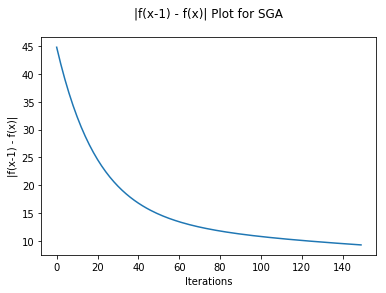

In [13]:
alpha = 0.00000000000001
beta = np.zeros(xOccDataTrain.shape[1])
noOfEpochs = 150
resSGA = log_reg_SGA(xOccDataTrain.as_matrix(), yOccDataTrain.as_matrix().flatten(), xOccDataTest.as_matrix(), yOccDataTest.as_matrix().flatten(), beta, alpha, noOfEpochs)
plt.plot(resSGA[1])
plt.title('|f(x-1) - f(x)| Plot for SGA'+"\n")
plt.xlabel('Iterations')
plt.ylabel('|f(x-1) - f(x)|')
plt.show()

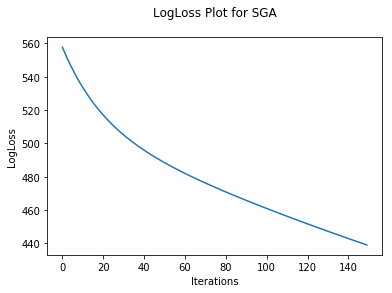

In [14]:
plt.plot(resSGA[2])
plt.title('LogLoss Plot for SGA'+"\n")
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.show()

**Stochastic Gradient Descent**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


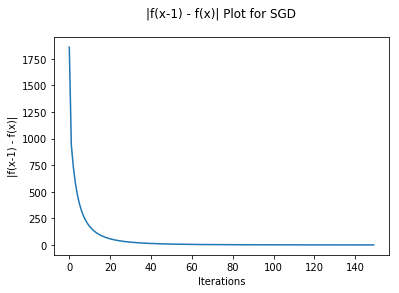

In [15]:
alpha = 0.000000000001
beta = np.zeros(xOccDataTrain.shape[1])
noOfEpochs = 150
resSGD = log_reg_SGD(xOccDataTrain.as_matrix(), yOccDataTrain.as_matrix().flatten(), xOccDataTest.as_matrix(), yOccDataTest.as_matrix().flatten(), beta, alpha, noOfEpochs)
plt.plot(resSGD[1])
plt.title('|f(x-1) - f(x)| Plot for SGD'+"\n")
plt.xlabel('Iterations')
plt.ylabel('|f(x-1) - f(x)|')
plt.show()

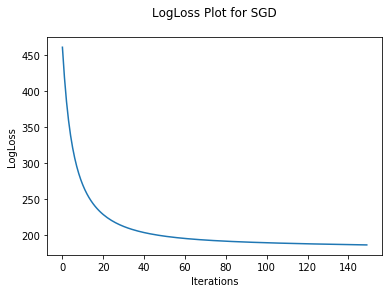

In [16]:
plt.plot(resSGD[2])
plt.title('LogLoss Plot for SGD'+"\n")
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.show()

**Stochastic Gradient Ascent using Bold Driver**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


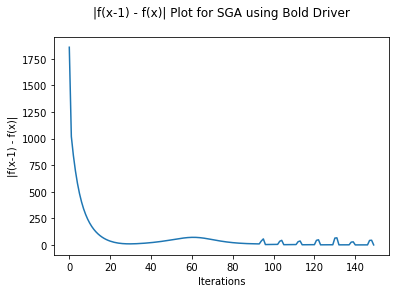

In [17]:
alpha = 0.000000000001
beta = np.zeros(xOccDataTrain.shape[1])
noOfEpochs = 150
resSGA_B = log_reg_boldDriver_SGA(xOccDataTrain.as_matrix(), yOccDataTrain.as_matrix().flatten(), xOccDataTest.as_matrix(), yOccDataTest.as_matrix().flatten(), beta, alpha, noOfEpochs)
plt.plot(resSGA_B[1])
plt.title('|f(x-1) - f(x)| Plot for SGA using Bold Driver'+"\n")
plt.xlabel('Iterations')
plt.ylabel('|f(x-1) - f(x)|')
plt.show()

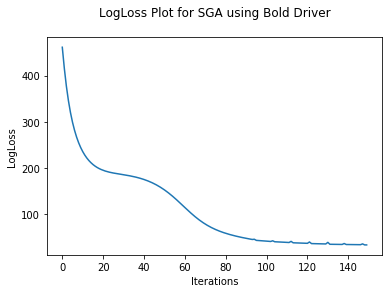

In [18]:
plt.plot(resSGA_B[2])
plt.title('LogLoss Plot for SGA using Bold Driver'+"\n")
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.show()

**Stochastic Gradient Descent using Bold Driver**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


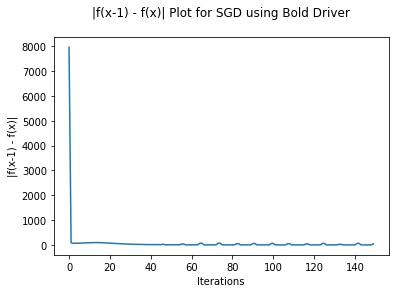

In [19]:
#alpha = 0.00000000000000001
alpha = 0.0000000001
beta = np.zeros(xOccDataTrain.shape[1])
noOfEpochs = 150
resSGD_B = log_reg_boldDriver_SGD(xOccDataTrain.as_matrix(), yOccDataTrain.as_matrix().flatten(), xOccDataTest.as_matrix(), yOccDataTest.as_matrix().flatten(), beta, alpha, noOfEpochs)
plt.plot(resSGD_B[1])
plt.title('|f(x-1) - f(x)| Plot for SGD using Bold Driver'+"\n")
plt.xlabel('Iterations')
plt.ylabel('|f(x-1) - f(x)|')
plt.show()

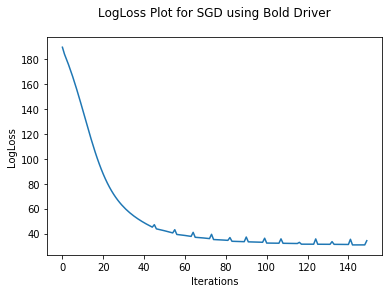

In [20]:
plt.plot(resSGD_B[2])
plt.title('LogLoss Plot for SGD using Bold Driver'+"\n")
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.show()

**Stochastic Gradient Ascent using Adagrad**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


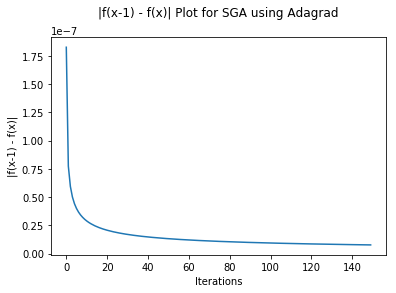

In [21]:
alpha = 0.000000000000001
beta = np.zeros(xOccDataTrain.shape[1])
noOfEpochs = 150
resSGA_A = log_reg_adagrad_SGA(xOccDataTrain.as_matrix(), yOccDataTrain.as_matrix().flatten(), xOccDataTest.as_matrix(), yOccDataTest.as_matrix().flatten(), beta, alpha, noOfEpochs)
plt.plot(resSGA_A[1])
plt.title('|f(x-1) - f(x)| Plot for SGA using Adagrad'+"\n")
plt.xlabel('Iterations')
plt.ylabel('|f(x-1) - f(x)|')
plt.show()

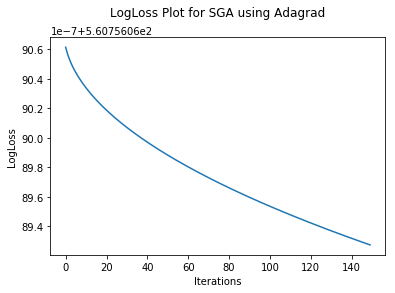

In [22]:
plt.plot(resSGA_A[2])
plt.title('LogLoss Plot for SGA using Adagrad'+"\n")
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.show()

**Stochastic Gradient Descent using Adagrad**

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


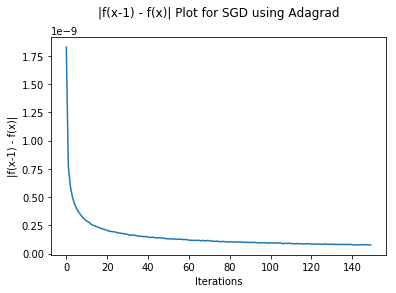

In [23]:
alpha = 0.00000000000000001
beta = np.zeros(xOccDataTrain.shape[1])
noOfEpochs = 150
resSGD_A = log_reg_adagrad_SGD(xOccDataTrain.as_matrix(), yOccDataTrain.as_matrix().flatten(), xOccDataTest.as_matrix(), yOccDataTest.as_matrix().flatten(), beta, alpha, noOfEpochs)
plt.plot(resSGD_A[1])
plt.title('|f(x-1) - f(x)| Plot for SGD using Adagrad'+"\n")
plt.xlabel('Iterations')
plt.ylabel('|f(x-1) - f(x)|')
plt.show()

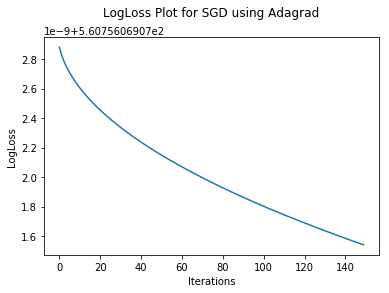

In [24]:
plt.plot(resSGD_A[2])
plt.title('LogLoss Plot for SGD using Adagrad'+"\n")
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.show()

$|f(xi−1) − f(xi)|$ Vs Iteration:
1. From all above graphs it is clear that these function differences converges. 
Here we see that as the number of iterations increase the convergence of the function is reaching its minima.

<h3> TestLogloss Vs iteration:</h3>
1. From all above graphs it is clear that values are also converging and decreasing a smoothly mannar. 

**Comparision**

Here we are going to compare the following: 
1. LogLoss SGA Bold DRiver vs SGA AdaGrad
2. LogLoss SGD Bold Driver vs SGD Adagrad

**LogLoss for SGA Bold Driver vs SGA AdaGrad**

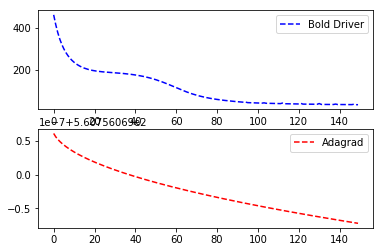

In [25]:
plt.title('SGA Bold Driver vs SGA AdaGrad'+"\n")
plt.subplot(211)
plt.plot(resSGA_B[2], 'b--', label="Bold Driver")
plt.legend()
plt.subplot(212)
plt.plot(resSGA_A[2], 'r--', label="Adagrad")
plt.legend()
plt.show()

From the above graph it is clear that Bold Driver method is performing better when compared to Adagrad.\
Actually Adagrad should perform better than Bold Driver. We can see that after 
about 70 iterations BoldDriver line becomes constant, whereas Adagrad is still decreasing to reach its minima and smoothen out. 

**LogLoss for SGD Bold Driver vs SGD AdaGrad**

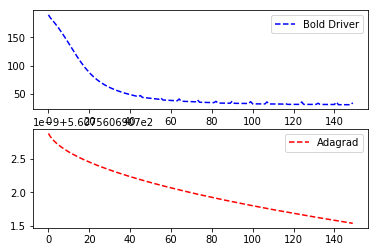

In [26]:
plt.subplot(211)
plt.plot(resSGD_B[2], 'b--', label="Bold Driver")
plt.legend()
plt.subplot(212)
plt.plot(resSGD_A[2], 'r--', label="Adagrad")
plt.legend()
plt.show()

From the above graph it is clear that Bold Driver method is performing better when compared to Adagrad. \
Actually Adagrad should perform better than Bold Driver. We can see that after 
about 70 iterations BoldDriver line becomes constant, whereas Adagrad is still decreasing to reach its minima and flatten out smoothly.